In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [4]:
output=pd.read_csv("test_t02dQwI.csv")
input=pd.read_csv('train_kOBLwZA.csv')
input['Item_Weight']='red'
output['Item_Weight']='white'
input['Outlet_Size']=input['Item_Weight'].apply(lambda x: 'NaN'
                                             if x[1:5] else 'small'
                                                 if x <= 7 else 'medium')
input['Outlet_Size']=pd.Categorical(input['Outlet_Size'],categories=['NaN','small','medium'])
output['Outlet_Size']=output['Item_Weight'].apply(lambda x: 'NaN'
                                             if x[1:5] else 'small'
                                                 if x <= 7 else 'medium')
output['Outlet_Size']=pd.Categorical(output['Outlet_Size'],categories=['NaN','small','medium'])

In [5]:

input_output=pd.concat([input,output],sort=True)
input_output=input_output.sample(frac=1,random_state=42).reset_index(drop=True)
input_output.head()


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Regular,FDT51,111.4544,NaN,Meat,0.010866,white,1985,OUT027,Tier 3,NaN,Supermarket Type3
1,Low Fat,FDB27,196.8768,1182.4608,Dairy,0.055476,red,1999,OUT049,Tier 1,NaN,Supermarket Type1
2,Low Fat,NCB07,197.0110,NaN,Household,0.077493,white,2004,OUT035,Tier 2,NaN,Supermarket Type1
3,Regular,FDY39,182.0608,7717.9536,Meat,0.000000,red,1985,OUT027,Tier 3,NaN,Supermarket Type3
4,Regular,DRA59,184.3924,NaN,Soft Drinks,0.128187,white,2002,OUT045,Tier 2,NaN,Supermarket Type1


ValueError: 'c' argument has 14204 elements, which is not acceptable for use with 'x' with size 1, 'y' with size 1.

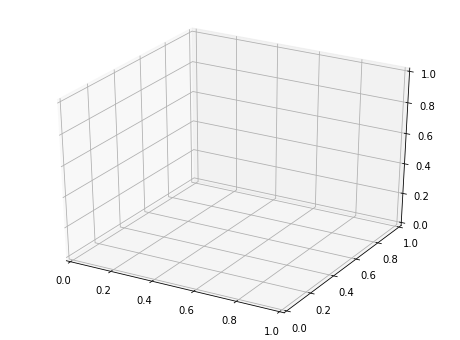

In [21]:
#now leveraging the concepts of hue and depth in scatter plots 4D Visualization
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection='3d')
xs=list(input_output['Item_MRP'])
ys=list(input_output['Item_Outlet_Sales'])
zs=list(input_output['Item_Visibility'])
data_points=[(x,y,z) for x,y,z in zip(xs,ys,zs)]
colors=['red' if io=='input' else 'yellow' for io in list(input_output['Item_Weight'])]

for data,color in zip(data_points,colors):
    x,y,z=data
ax.scatter(x ,y ,z ,c=colors,alpha=0.4,s=50,edgecolor='none')

ax.set_xlabel('Item_MRP')
ax.set_ylabel('Item_Outlet_Sales')
ax.set_zlabel('Item_Visibility')